<a href="https://colab.research.google.com/github/weiyunna/Data-Visualization/blob/master/Introduction_to_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Tutorial: Python Plotting

This Matplotlib tutorial takes you through the basics Python data visualization: the anatomy of a plot, pyplot and pylab, and much more

Humans are very visual creatures: we understand things better when we see things visualized. However, the step to presenting analyses, results or insights can be a bottleneck: you might not even know where to start or you might have already a right format in mind, but then questions like “Is this the right way to visualize the insights that I want to bring to my audience?” will have definitely come across your mind.

When you’re working with the Python plotting library Matplotlib, the first step to answering the above questions is by building up knowledge on topics like:

* **The anatomy of a Matplotlib plot:** what is a subplot? What are the Axes? What exactly is a figure?
* **Plot creation**, which could raise questions about what module you exactly need to import (pylab or pyplot?), how you exactly should go about initializing the figure and the Axes of your plot, how to use matplotlib in Jupyter notebooks, etc.
* **Plotting routines**, from simple ways to plot your data to more advanced ways of visualizing your data.
* **Basic plot customizations**, with a focus on plot legends and text, titles, axes labels and plot layout.
*  **Saving, showing, clearing, … your plots**: show the plot, save one or more figures to, for example, pdf files, clear the axes, clear the figure or close the plot, etc.
* Lastly, you’ll briefly cover two ways in which you can **customize Matplotlib**: with style sheets and the rc settings.


# What Does A Matplotlib Python Plot Look Like?

At first sight, it will seem that there are quite some components to consider when you start plotting with this Python data visualization library. You’ll probably agree with me that it’s confusing and sometimes even discouraging seeing the amount of code that is necessary for some plots, not knowing where to start yourself and which components you should use.

Luckily, this library is very flexible and has a lot of handy, built-in defaults that will help you out tremendously. As such, you don’t need much to get started: you need to make the necessary imports, prepare some data, and you can start plotting with the help of the plot() function! When you’re ready, don’t forget to show your plot using the show() function.

Look at this example to see how easy it really is:

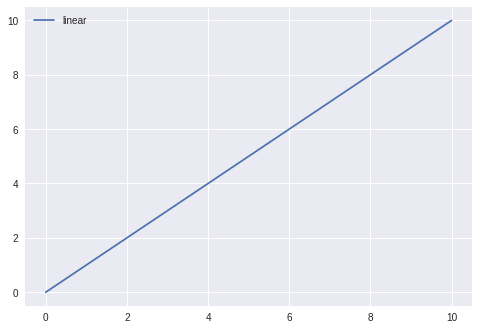

In [1]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
x = np.linspace(0, 10, 100)

# Plot the data
plt.plot(x, x, label='linear')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Note that you import the** pyplot** module of the** matplotlib library** under the alias **plt.**

What you can’t see on the surface is that you have -maybe unconsciously- made use of the built-in defaults that take care of the creation of the underlying components, such as the Figure and the Axes. You’ll read more about these defaults in the section that deals with the differences between pylab and pyplot.

For now, you’ll understand that working with matplotlib will already become a lot easier when you understand how the underlying components are instantiated. Or, in other words, what the anatomy of a matplotlib plot looks like:


In essence, there are two big components that you need to take into account:

* The **Figure** is the overall window or page that everything is drawn on. It’s the top-level component of all the ones that you will consider in the following points. You can create multiple independent Figures. A Figure can have several other things in it, such as a suptitle, which is a centered title to the figure. You’ll also find that you can add a legend and color bar, for example, to your Figure.
* To the figure you add Axes. The Axes is the area on which the data is plotted with functions such as **plot() ** and **scatter()** and that can have ticks, labels, etc. associated with it. This explains why Figures can contain multiple Axes.

**Tip:** when you see, for example, **plt.xlim**, you’ll call **ax.set_xlim()** behind the covers. All methods of an Axes object exist as a function in the pyplot module and vice versa. Note that mostly, you’ll use the functions of the pyplot module because they’re much cleaner, at least for simple plots!

You’ll see what “clean” means when you take a look at the following pieces of code. Compare, for example, this piece of code:



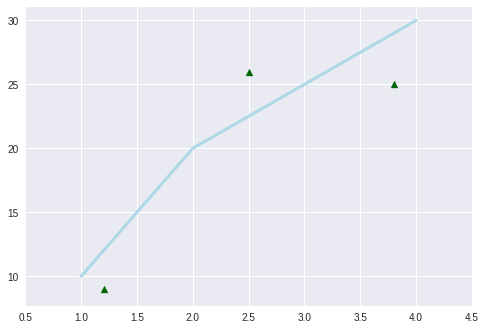

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

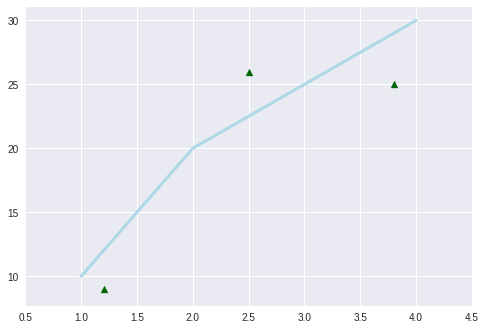

In [3]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.show()

However, if you have multiple axes, it’s still better to make use of the first code chunk because it’s always better to prefer explicit above implicit code! In such cases, you want to make use of the Axes object **ax**.

Next to these two components, there are a couple more that you can keep in mind:

* Each Axes has an **x-axis **and a **y-axis**, which contain **ticks**, which have major and minor ticklines and ticklabels. There’s also the axis **labels**, **title**, and **legend** to consider when you want to customize your axes, but also taking into account the axis ** scales**  and **gridlines** might come in handy.

* **Spines** are lines that connect the axis tick marks and that designate the boundaries of the data area. In other words, they are the simple black square that you get to see when you don’t plot any data at all but when you have initialized the Axes, like in the picture below:

**Note** that you’ll sometimes also read about **Artist objects**, which are virtually all objects that the package has to offers to users like yourself. Everything drawn using Matplotlib is part of the Artist module. The containers that you will use to plot your data, such as Axis, Axes and Figure, and other graphical objects such as text, patches, etc. are types of Artists.

#Multiple Axes

We've mentioned before that a figure can have more than one Axes on it. If you want your axes to be on a regular grid system, then it's easiest to use **plt.subplots(...) ** to create a figure and add the axes to it automatically.

For example:

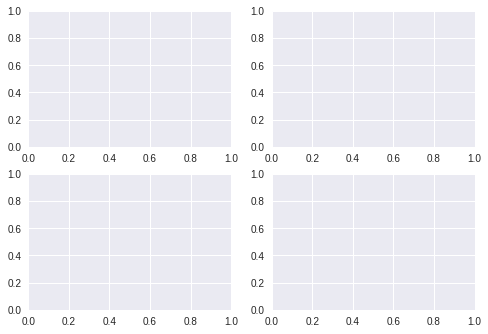

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()


**plt.subplots(...)** created a new figure and added 4 subplots to it. The axes object that was returned is a 2D numpy object array. Each item in the array is one of the subplots. They're laid out as you see them on the figure.

Therefore, when we want to work with one of these axes, we can index the axes array and use that item's methods.

For example:

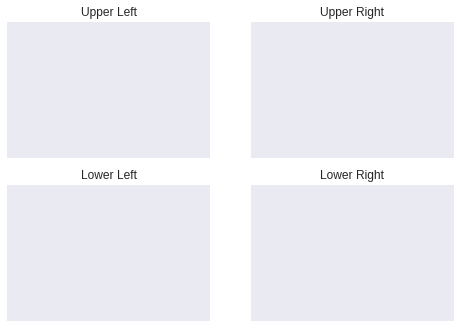

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()


One really nice thing about **plt.subplots()** is that when it's called with no arguments, it creates a new figure with a single subplot.

Any time you see something like

`fig = plt.figure()`

`ax = fig.add_subplot(111)`

You can replace it with:
 
 `fig, ax = plt.subplots()`
 
We'll be using that approach for the rest of the examples. It's much cleaner.

However, keep in mind that we're still creating a figure and adding axes to it. When we start making plot layouts that can't be described by subplots, we'll go back to creating the figure first and then adding axes to it one-by-one.

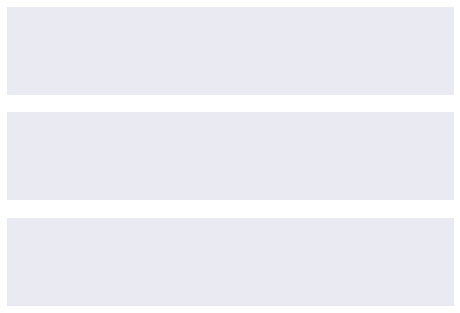

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1)

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


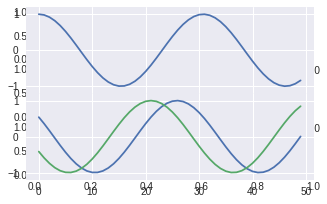

In [57]:

# Try to reproduce the figure shown in images/exercise_1-1.png
fig, axes = plt.subplots(nrows=3, ncols=1)

ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.cos(x))
ax2.plot(np.cos(x+1))
ax3.plot(np.cos(x+2))


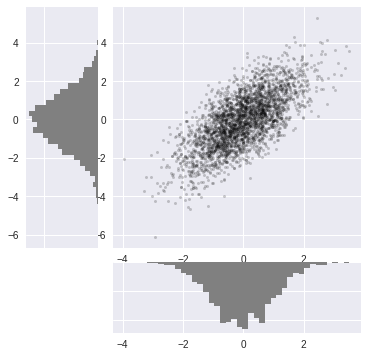

In [20]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

Text(0.5, 1.0, 'Signal 3')

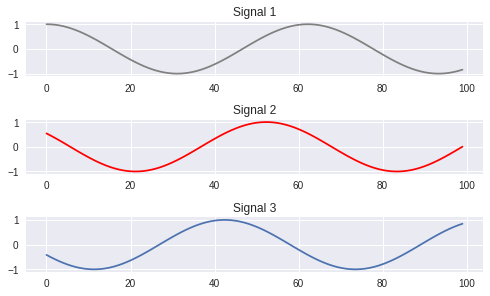

In [55]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(6, 6, hspace=0.8, wspace=0.8)
ax1 = fig.add_subplot(grid[0, 1:])
ax2 = fig.add_subplot(grid[1, 1:], sharex=ax1)
ax3 = fig.add_subplot(grid[2, 1:], sharex=ax1)

x = np.linspace(0, 10,100)
ax1.plot(np.cos(x), color='gray')
ax1.set_title('Signal 1')
ax2.plot(np.cos(x+1), color='red')
ax2.set_title('Signal 2')
ax3.plot(np.cos(x+2))
ax3.set_title('Signal 3')




# Matplotlib, pyplot and pylab: how are they related?

First off, you’ll already know Matplotlib by now. When you talk about “Matplotlib”, you talk about the whole Python data visualization package. This should not come to you as a big surprise :)

Secondly, **pyplot** is a module in the **matplotlib** package. That’s why you often see **matplotlib.pyplot** in code. The module provides an interface that allows you to implicitly and automatically create figures and axes to achieve the desired plot.

This is especially handy when you want to quickly plot something without instantiating any Figures or Axes, as you saw in the example in the first section of this tutorial. You see, you haven’t explicitly specified these components, yet you manage to output a plot that you have even customized! The defaults are initialized and any customizations that you do, will be done with the current Figure and Axes in mind.

Lastly, **pylab** is another module, but it gets installed alongside the **matplotlib** package. It bulk imports **pyplot** and the **numpy** library and was generally recommended when you were working with arrays, doing mathematics interactively and wanted access to plotting features.

You might still see this popping up in older tutorials and examples of matplotlib, but its use is no longer recommended, especially not when you’re using the IPython kernel in your Jupyter notebook. You can read more about this here.

As a solution, you can best use **%matplotlib **magic in combination with the right backend, such as **inline**, **qt**, etc. Most of the times, you will want to use **inline**, as this will make sure that the plots are embedded inside the notebook. Read more about that in DataCamp’s Definitive Guide to Jupyter Notebook.

**Note** that also when you’re not working in a Jupyter notebook, you’ll still need to choose a different backend, depending on your use case. In other words, if you don’t want to embed plots inside a notebook, but you rather want to embed them into graphical user interfaces, in batch scripts or web application servers, etc., you will need to specify the backend that you want to use. However, this topic is outside the scope of this tutorial; Instead, the tutorial assumes that you will be using Matplotlib to save your images to your local file system

# Data For Matplotlib Plots

As you have read in one of the previous sections, Matplotlib is often used to visualize analyses or calcuations. That’s why the first step that you have to take in order to start plotting in Python yourself is to consider revising NumPy, the Python library for scientific computing.

Scientific computing might not really seem of much interest, but when you’re doing data science you’ll find yourself working a lot with data that is stored in arrays. You’ll need to perform operations on them, inspect your arrays and manipulate them so that you’re working with the (subset of the) data that is interesting for your analysis and that is in the right format, etc.

In short, you’ll find NumPy extremely handy when you’re working with this data visualization library. If you’re interested in taking a NumPy tutorial to start well-prepared, go and take DataCamp’s tutorial and make sure to have your copy of our NumPy cheat sheet close!

Of course, arrays are not the only thing that you pass to your plotting functions; There’s also the possibility to, for example, pass Python lists. If you would like to know more about Python lists, consider checking out our Python list tutorial or the free Intro to Python for Data Sciencecourse.

# Create Your Plot

Alright, you’re off to create your first plot yourself with Python! As you have read in one of the previous sections, the Figure is the first step and the key to unlocking the power of this package. Next, you see that you initialize the axes of the Figure in the code chunk above with **fig.add_axes()**:

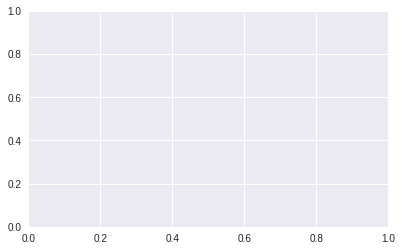

In [58]:
# Import `pyplot`
import matplotlib.pyplot as plt

# Initialize a Figure 
fig = plt.figure()

# Add Axes to the Figure
fig.add_axes([0,0,1,1])

# What Is A Subplot?
You have seen all components of a plot and you have initialized your first figure and Axes, but to make things a bit more complicated, you’ll sometimes see subplots pop up in code.

Now, don’t get discouraged just yet!

You use subplots to set up and place your Axes on a regular grid. So that means that in most cases, Axes and subplot are synonymous, they will designate the same thing. When you do call subplot to add Axes to your figure, do so with the **add_subplots()** function. There is, however, a difference between the **add_axes()** and the **add_subplots()** function, but you’ll learn more about this later on in the tutorial.

Consider the following example:

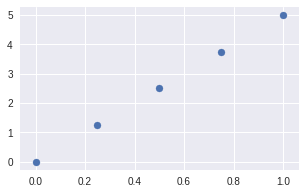

In [59]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np

# Create a Figure
fig = plt.figure()

# Set up Axes
ax = fig.add_subplot(111)

# Scatter the data
ax.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5))

# Show the plot
plt.show()

You see that the add_subplot() function in itsef also poses you with a challenge, because you see **add_subplots**(111) in the above code chunk.

What does **111** mean?

Well, **111** is equal to 1,1,1, which means that you actually give three arguments to add_subplot(). The three arguments designate the** number of rows (1),**  **the number of columns (1)** and** the plot number (1)**. So you actually make one subplot.

Note that you can really go bananas with this function when you are using this function, especially when you’re just starting out with this library and you keep on forgetting for what the three numbers stand.

Consider the following commands and try to envision what the plot will look like and how many Axes your Figure will have: `ax = fig.add_subplot(2,2,1)`.

Got it?

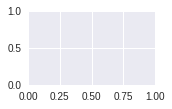

In [62]:
# Create a Figure
fig = plt.figure()

# Set up Axes
ax = fig.add_subplot(221)

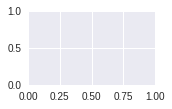

In [64]:
# Create a Figure
fig = plt.figure()

# Set up Axes
ax = fig.add_subplot(222)

That’s right, your Figure will have four axes in total, arranged in a structure that has two rows and two columns. With the line of code that you have considered, you say that the variable **ax is the first of the four axes** to which you want to start plotting. The “first” in this case means that it will be the first axes on the left of the 2x2 structure that you have initialized.

# What Is The Difference Between add_axes() and add_subplot()?

The difference between** fig.add_axes() **and** fig.add_subplot()** doesn’t lie in the result: they both return an Axes object. However, they do differ in the mechanism that is used to add the axes: you pass a list to **add_axes()** which is the lower left point, the width and the height. This means that the axes object is positioned in absolute coordinates.

In contrast, the** add_subplot()** function doesn’t provide the option to put the axes at a certain position: it does, however, allow the axes to be situated according to a subplot grid, as you have seen in the section above.

**In most cases, you’ll use add_subplot() **to create axes; Only in cases where the positioning matters, you’ll resort to add_axes(). Alternatively, you can also use subplots() if you want to get one or more subplots at the same time. You’ll see an example of how this works in the next section.

# How To Change The Size of Figures

Now that you have seen how to initialize a Figure and Axes from scratch, you will also want to know how you can change certain small details that the package sets up for you, such as the figure size.

Let’s say you don’t have the luxury to follow along with the defaults and you want to change this. How do you set the size of your figures manually?

Like everything with this package, it’s pretty easy, but you need to know first what to change.

Add an argument figsize to your **plt.figure()** function of the pyplot module; You just have to specify a tuple with the width and hight of your figure in inches, just like this plt.figure(**figsize**=(3,4)), for it to work.

Note that you can also pass **figsize** to the the **plt.subplots() **function of the same module; The inner workings are the same as the figure() function that you’ve just seen.

See an example of how this would work here:

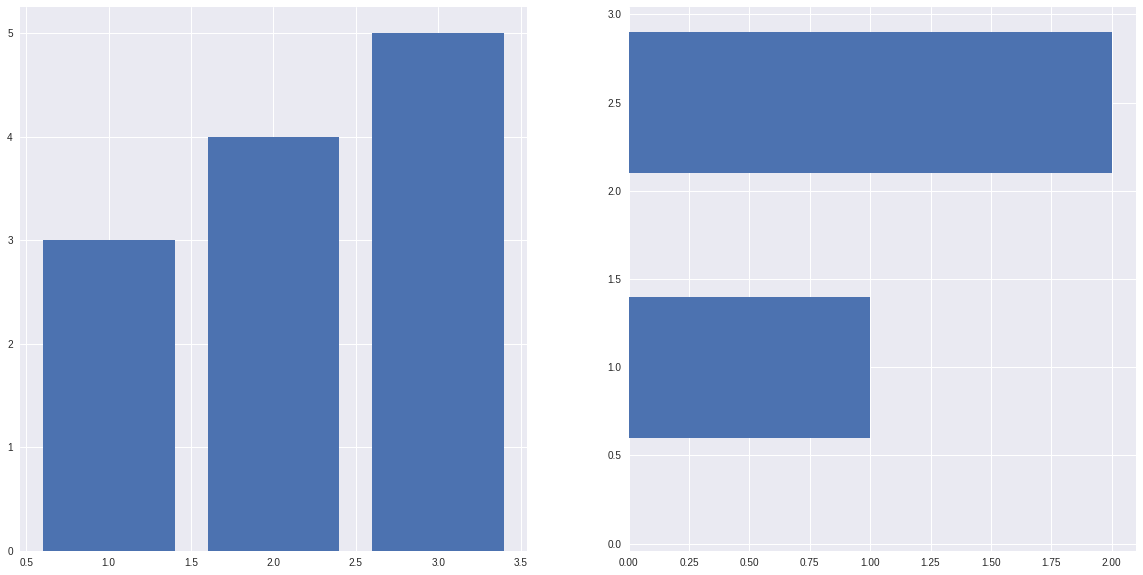

In [65]:
# Import `pyplot` from `matplotlib`
import matplotlib.pyplot as plt

# Initialize the plot
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# or replace the three lines of code above by the following line: 
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

# Plot the data
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])

# Show the plot
plt.show()

# Working With Pyplot: Plotting Routines

Now that all is set for you to start plotting your data, it’s time to take a closer look at some plotting routines. You’ll often come across functions like **plot()** and **scatter()**, which either draw points with lines or markers connecting them, or draw unconnected points, which are scaled or colored.

But, as you have already seen in the example of the first section, you shouldn’t forget to pass the data that you want these functions to use!

These functions are only the bare basics. You will need some other functions to make sure your plots look awesome:

If you’re curious how you can use these functions to plot your data, consider the following example. Note that the **x** and **y** variables have already been loaded in for you:

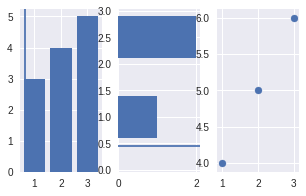

In [67]:
# Import `pyplot` from `matplotlib`
import matplotlib.pyplot as plt

# Initialize the plot
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot the data
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])
ax2.axhline(0.45)
ax1.axvline(0.65)
ax3.scatter([1,2,3],[4,5,6])

# Show the plot
plt.show()

Most functions speak for themselves because the names are quite clear. But that doesn’t mean that you need to limit yourself: for example, the **fill_between()** function is perfect for those who want to create area plots, but they can also be used to create a stacked line graph; Just use the plotting function a couple of times to make sure that the areas overlap and give the illusion of being stacked.

Note that, of course, simply passing the data is not enough to create great plots. Make sure to manipulate your data in such a way that the visualization makes sense: don’t be afraid to **change your array shape**, **combine arrays,** etc.

When you move on and you start to work with vector fields or data distributions, you might want to check out the following functions:

Note of course that you probably won’t use all of the functions listed in these tables; It really depends on your data and your use case. If you’re totally new to data science, you might want to check out the statistical plotting routines first!

On the other hand, when you work with 2-D or n-D data, you might also find yourself in need of some more advanced plotting routines, like these ones:

**Note** that contour plots are used to explore the potential relationship between three variables. Just like contour plots, also pseudocolor plots can be used for this purpose, since they are surface plot seen from above. Of course, this are not nearly all the functions that you can use to plot your data.

If you’re working with images or 2D data, for example, you might also want to check out **imshow()** to show images in your subplots. For a practical example of how to use the** imshow()** function, go to DataCamp’s scikit-learn tutorial.

The examples in the tutorial also make clear that this data visualization library is really the cherry on the pie in the data science workflow: you have to be quite well-versed in general Python concepts, such as lists and control flow, which can come especially handy if you want to automate the plotting for a great number of subplots. If you feel like revising these concepts, consider taking the free introduction to Python for data science course.

# Customizing Your PyPlot
A lot of questions about this package come from the fact that there are a lot of things that you can do to personalize your plots and make sure that they are unique: besides adjusting the colors, you also have the option to change markers, linestyles and linewidths, add text, legend and annotations, and change the limits and layout of your plots.

It’s exactly the fact that there is an endless range of possibilities when it comes to these plots that makes it difficult to set out some things that you need to know when you start working on this topic.

Great tips that you should keep in the back of your mind are not only the gallery, which contains many real-life examples that are already coded for you and which you can use, but also the documentation, which can tell you more about the arguments that you can pass to certain functions to adjust visual features.

Also keep in mind that there are multiple solutions for one problem and that you learn most of this stuff when you’re getting your hands dirty with the package itself and when you run into troubles. You’ll see some of the most common questions and solutions in this section.

## Deleting an Axes
If you ever want to remove an axes form your plot, you can use delaxes() to remove and update the current axes:

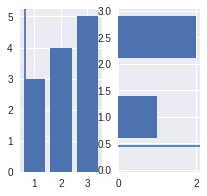

In [69]:
# Import `pyplot` from `matplotlib`
import matplotlib.pyplot as plt
import numpy as np

# Initialize the plot
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot the data
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])
ax2.axhline(0.45)
ax1.axvline(0.65)
ax3.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5))

# Delete `ax3`

fig.delaxes(ax3)

# Show the plot
plt.show()

Note that you can restore a deleted axes by adding**` fig.add_axes(ax)`** right after **`fig.delaxes(ax3).`**

## How To Put The Legend Out of the Plot
There are a number of ways to address this question, but mostly all come back to the arguments that you can provide to**` legend():`**

* You can specify the loc or location argument to something like center left or upper right, which ensures that your legend does not fall in the Axes or subplot area.

* Alternatively, you can also add the **bbox_to_anchor** argument to your function and pass a tuple with the coordinates in which you want to put the legend. In this case, the box is put in the upper right corner of the plotting area: ax.legend(bbox_to_anchor=(1.1, 1.05)).

## How To Set Plot Title And Axes Labels

To change your plot title and axes labels, you can follow one of the following approaches, depending of which container of which you want to make use:

* The easiest way to set these things right is by using **`ax.set(title="A title", xlabel="x", ylabel="y") or ax.set_xlim(), ax.set_ylim() or ax.set_title().`**
* If you want to work with the figure, you might also resort to **`fig.suptitle()`** to add a title to your plot.
* If you’re making use of the default settings that the package has to offer, you might want to use **`plt.title(), plt.xlabel(), plt.ylabel()`**.

* Define your own style sheet or change the default **matplotlibrc** settings. Read more about this here.

## How To Fix The Plot Layout

A thing to consider when you’re using subplots to build up your plot is the **tight_layout** function, which will help you to make sure that the plots fit nicely in your figure. You ideally call it after you have plotted your data and customized your plot; So that’s right before you call **`plt.show() `**that you should use **`plt.tight_layout().`**

Additionally, you might also be interested to use **`subplots_adjust()`**, which allows you to manually set the width and height reserved for blank space between subplots, and also fix the left and right sides, and the top and bottom of the subplots.

# Showing, Saving And Closing Your Plot
After you have done all the necessary customizations, you will want to show your plot because, as you will have noticed from working in the terminal, you just get to see that an object is made, but you never see the nice plot every time you make adjustments.

In the first example of this tutorial, this was implicitly done;

Do you remember? It’s this piece of code:

The line**` plt.show()`** says indeed that you want to see the plot. If you execute this line, you’ll see a window popping up. And you’ll see if it looks like what you had in your mind!

But this is where your questions start. How can I save this image and if it’s not to your liking, can you clear the image so that you can start anew? The following short sections will cover these questions.

## How To Save A Plot To An Image File
You can easily save a figure to, for example, a png file by making use of **`plt.savefig()`**. The only argument you need to pass to this function is the file name, just like in this example:

By just executing this line of code, you’ll save the plot that you have made to an image file instead of displaying it.

In [0]:
# Save Figure
plt.savefig("foo.png")

# Save Transparent Figure
plt.savefig("foo.png", transparent=True)

## How To Save A Plot To A Pdf File
If you want to save multiple plots to a pdf file, you want to make use of the pdf backend, which you can easily import:

In [0]:
# Import PdfPages
from matplotlib.backends.backend_pdf import PdfPages

# Initialize the pdf file
pp = PdfPages('multipage.pdf')

# Save the figure to the file
pp.savefig()

# Close the file
pp.close()

## When To Use cla(), clf() or close()?
When you’re finally ready with the inspection of your plot, it’s time to move on with something else (maybe with another plot!). When you’re working with this data visualization library for the first time, it might be weird at start because you can, of course, shut down the GUI window that appears, but that’s usually not the way you want to handle things, because it doesn’t always work as well when you’re working on several things at a time.

You have to explicitly tell Matplotlib to close down the plot that you’ve been working on so that you can move on. There are three functions that will come in handy once you’re at this point:

Use 
* **`plt.cla()`** to clear an axis,
* **`plt.clf()`** to clear the entire figure, and
* **`plt.close()`** to close a window that has popped up to show you your plot.

# Customizing Matplotlib

By now, you’re already familiar with some basic options to customize your plots. But what if the customizations that you want to make situate more on a library level instead of a plot level? In such cases, also, you don’t need to panic: Matplotlib offers you several options to adjust some of the internal workings. This section will just cover two options, namely style sheets and rc settings.

If you want to know more, definitely check out this page.

In [0]:
 #Import `pyplot` 
import matplotlib.pyplot as plt

# Set the style to `ggplot`
plt.style.use("ggplot")

## rc Settings

“rc” is common for configuration files: they usually end in **`rc`**. It comes from the practice of having configs as executables: they are automatically run and configure settings, for example. You can read more about it here. Matplotlib has such an rc file to which you can make adjustments dynamically and statically.

To dynamically change default rc settings, you can use the rcParams variable:

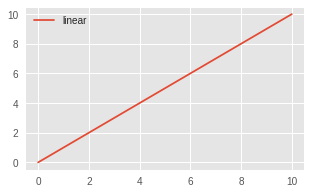

In [73]:
# Import the necessary packages and modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Uncomment following line to see the effect 
#mpl.rcParams['lines.linewidth'] = 5

# Prepare the data
x = np.linspace(0, 10, 100)

# Plot the data
plt.plot(x, x, label='linear')

# Add a legend
plt.legend()

# Show the plot
plt.show()

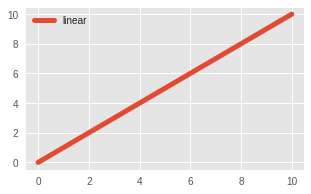

In [74]:
# Import the necessary packages and modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Uncomment following line to see the effect 
mpl.rcParams['lines.linewidth'] = 5

# Prepare the data
x = np.linspace(0, 10, 100)

# Plot the data
plt.plot(x, x, label='linear')

# Add a legend
plt.legend()

# Show the plot
plt.show()

You just adjusted the line width in the example above, but you can also change figure size and dpi, line width, color and style, axes, axis and grid properties, text and font properties, …

If you want to work more statically, you should probably also know that you have a **matplotlibrc** configuration file, which you can use to customize all kinds of properties (just like you did above with the line width parameter). If you want to find this specific file, you can just run the following:

In [75]:
import matplotlib

matplotlib.matplotlib_fname()

'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc'

# Continue Learning

Congratulations! You have gone through today’s Matplotlib tutorial successfully! There is still much to learn, but you’re definitely ready to go out on your own and create your own amazing plots. Don’t miss out on DataCamp’s Matplotlib cheat sheet that can help you to make plots in no time, step by step.

If you’re eager to discover more from Matplotlib, consider checking out DataCamp’s Viewing 3D Volumetric Data With Matplotlib tutorial to learn how to work with matplotlib’s event handler API or this tutorial, in which you’ll learn all about animating your plots.

If you’re ready to start exploring interactive data visualizations with Python, consider taking DataCamp’s **Bokeh course** and don’t miss our **Bokeh cheat sheet.**